# Programming Exercise 0: Basic Python and Linear Regression

## 0.1 Basic Python: pandas, numpy and matplotlib

Excerpted and modified from Python Machine Learning (Sebastian Raschka, 2019)

In [92]:
import numpy as np
import os
import pandas as pd
root = 'Exercise1/'

Let's start practicing python by playing with some data. We will load a dataset (Iris) using the data handling package, pandas. We can then look at the information about the data by print it out (or by df.head(), df.tail())

In [107]:
df = pd.read_csv('iris.csv', header=0, encoding='utf-8')
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


Let's practice some basic data processing using slicing and plot the data using matplotlib, the plotting package

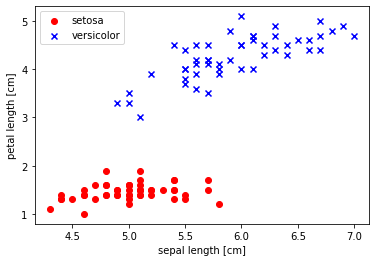

In [94]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.show()

Let's try to do a simple linear regression by using the LinearRegression model from sklearn, the module for python machine learning. We will start with a simple single variable regression, where X (feature) = petal.width and Y (target) = petal.length

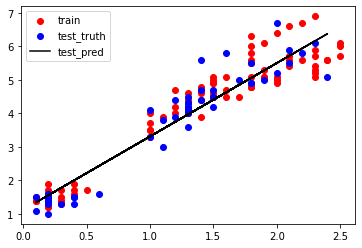

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
### NOT USING
string_to_categorical = {'Setosa': 0, 'Versicolor': 1, 'Virginica': 2}
X = np.array([string_to_categorical[x] for x in list(df['variety'].values)])
###

# Variables
X = df['petal.width'].values
y = df['petal.length'].values

# Splitting the Dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.33, random_state= 101)

# Instantiating LinearRegression() Model
lr = LinearRegression()

# Training/Fitting the Model
lr.fit(np.expand_dims(X_train, 1), y_train)

# Making Predictions
pred = lr.predict(np.expand_dims(X_test, 1))

# Let's define a model to plot the Result
def plot_regression(X_train, y_train, X_test, y_test, pred, color):
    plt.scatter(X_train, y_train, color='red', marker='o', label='train')
    plt.scatter(X_test, y_test, color='blue', marker='o', label='test_truth')
    plt.plot(X_test, pred, color=color, label='test_pred')
    plt.legend()
    plt.show()

plot_regression(X_train, y_train, X_test, y_test, pred, color='black')


In the previous section we use the .predict method of the regression model (lr) to get the testing prediction (pred). The linear regression model can be written as pred = a * X + b. Can you calculate the pred value explicitly?

found slope: [2.19027192]
found intercept: 1.1212488014589304


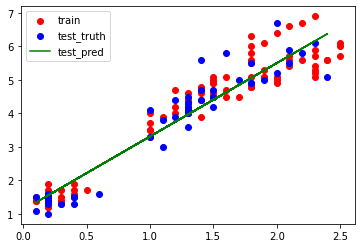

In [109]:
a = lr.coef_
b = lr.intercept_
print('found slope: ' + str(a))
print('found intercept: ' + str(b))

# ====================== YOUR CODE HERE =====================
pred_manually = None
# ====================== YOUR CODE HERE =====================

plot_regression(X_train, y_train, X_test, y_test, pred_manually, color='green')

## 0.2 Optimize a Linear Regression Model
Previously, we utilized the linear regression model in scikit-learn (from sklearn.linear_model import LinearRegression) directly. Although you can call most of the machine learning model from python packages, it is important to know how them work behind the scene and code it up
self once in a while (that's why we have a course!). Now Let's try to do a simple linear regression by hand. The first step is to provide a lost function.

Remember the objective of linear regression is to minimize the cost function

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2$$

where the hypothesis $h_\theta(x)$ is given by the linear model
$$ h_\theta(x) = \theta^Tx = \theta_0 + \theta_1 x_1$$

Now, we are doing a simple one variable regression, so the only feature $(x_1)$ should just be X, while we have two parameters, $\theta_0$ for the intercept and $\theta_1$ for the slope. We put them together in a array (theta = [$\theta_0$, $\theta_1$]), so $\theta_0$ = theta[0] and $\theta_1$ = theta[1]

In [97]:
def regression_lost_function(X, y, theta):
    """
    Compute cost for linear regression. Computes the cost of using theta as the
    parameter for linear regression to fit the data points in X and y.

    Parameters
    ----------
    X : array_like
        The input dataset of shape (m x n+1), where m is the number of examples,
        and n is the number of features. We assume a vector of one's already
        appended to the features so we have n+1 columns.

    y : array_like
        The values of the function at each data point. This is a vector of
        shape (m, ).

    theta : array_like
        The parameters for the regression function. This is a vector of
        shape (n+1, ).

    Returns
    -------
    loss : float
        The value of the regression cost function.

    Instructions
    ------------
    Compute the cost of a particular choice of theta.
    You should set J to the cost.
    """

    # initialize some useful values
    m = y.size  # number of training examples

    # You need to return the following variables correctly
    loss = None

    # ====================== YOUR CODE HERE =====================
    # HINT: FIRSTS TIME THE FEATURE X WITH THETA1, THEN PLUS THETA0. THE SQUARE ERROR SHOULD BE THE DIFFERENCE BETWEEN PREDICTION AND THE TARGET Y, TAKE NP.SQUARE, AND TAKE THE AVERAGE (NP,SUM) THEN OVER 2 * M

    # ===========================================================
    return loss

In [98]:
J = regression_lost_function(X_train, y_train, theta=np.array([0.0, 0.0]))
print('With theta = [0, 0] \nCost computed = %.2f' % J)
print('Expected cost value (approximately) 32.7\n')

# further testing of the cost function
J = regression_lost_function(X_train, y_train, theta=np.array([-1, 2]))
print('With theta = [-1, 2]\nCost computed = %.2f' % J)
print('Expected cost value (approximately) 54.24')

With theta = [0, 0] 
Cost computed = 8.82
Expected cost value (approximately) 32.7

With theta = [-1, 2]
Cost computed = 2.89
Expected cost value (approximately) 54.24
With theta = [0, 0] 
Cost computed = 8.82
Expected cost value (approximately) 32.7

With theta = [-1, 2]
Cost computed = 2.89
Expected cost value (approximately) 54.24


In [102]:
def gradientDescent(X, y, theta, learning_rate, num_iters):
    """
    Performs gradient descent to learn `theta`. Updates theta by taking `num_iters`
    gradient steps with learning rate `alpha`.

    Parameters
    ----------
    X : array_like
        The input dataset of shape (m x n+1).

    y : array_like
        Value at given features. A vector of shape (m, ).

    theta : array_like
        Initial values for the linear regression parameters.
        A vector of shape (n+1, ).

    learning_rate : float
        The learning rate.

    num_iters : int
        The number of iterations for gradient descent.

    Returns
    -------
    theta : array_like
        The learned linear regression parameters. A vector of shape (n+1, ).

    loss_history : list
        A python list for the values of the cost function after each iteration.

    theta_history : list
        A python list for the values of the parameters after each iteration.

    Instructions
    ------------
    Peform a single gradient step on the parameter vector theta.

    While debugging, it can be useful to print out the values of
    the cost function (computeCost) and gradient here.
    """
    # Initialize some useful values
    m = y.shape[0]  # number of training examples

    # make a copy of theta, to avoid changing the original array, since numpy arrays
    # are passed by reference to functions
    theta = theta.copy()

    loss_history = [] # Use a python list to save cost in every iteration
    theta_history = []

    for i in range(num_iters):
        # ==================== YOUR CODE HERE =================================
        # HINT: USE NP.MULTIPLY FOR ELEMENT-WISE MULTIPLICATION
        # FIRST YOU WANT TO CALCULATE THE VALUE OF PREDICTION, h =  (X*θ_1 + θ_0),
        # THEN THE DIFFERENCE h BETWEEN PREDICTION AND TARGET, diff = h - y
        # THEN ∂loss/∂θ_1 = 2 * X * (h - y)
        # THEN ∂loss/∂θ_0 = 2 * (h - y)
        # THEN ∂θ_1(NEW) = ∂θ_1(OLD) - learning / 2m * ∂loss/∂θ_1
        # THEN ∂θ_0(NEW) = ∂θ_0(OLD) - learning / 2m * ∂loss/∂θ_0
        # =====================================================================

        # save the cost J in every iteration
        loss_history.append(regression_lost_function(X, y, theta))
        theta_history.append(theta.copy())

    theta_history = np.stack(theta_history, 1)
    return theta, loss_history, theta_history

Now let's use gradient descent to optimize the linear regression function. We will start theta with two zeros (theta = np.zeros(2)) and optimize the value from there. Does your result match the one we have ealier using scikit-learn?

Theta found by gradient descent: 1.1286, 2.1856
Expected theta values (approximately): [1.1286, 2.1856]


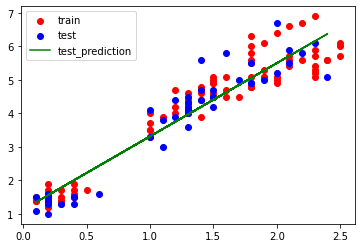

In [103]:
import numpy as np
# initialize fitting parameters
theta = np.zeros(2)

# some gradient descent settings
iterations = 1500
learning_rate = 0.01

theta, loss_history, theta_history = gradientDescent(X_train ,y_train, theta, learning_rate, iterations)
print('Theta found by gradient descent: {:.4f}, {:.4f}'.format(*theta))
print('Expected theta values (approximately): [1.1286, 2.1856]')

plt.scatter(X_train, y_train, color='red', marker='o', label='train')
plt.scatter(X_test, y_test, color='blue', marker='o', label='test')
plt.plot(X_test, np.dot(X_test, theta[1]) + theta[0], color='green', label='test_prediction')
plt.legend()#['Training data', 'Linear regression']);
plt.show()

Let's plot the parameters over the optimization step. What will happen if you change the learning rate earlier?

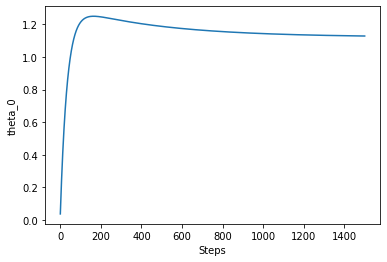

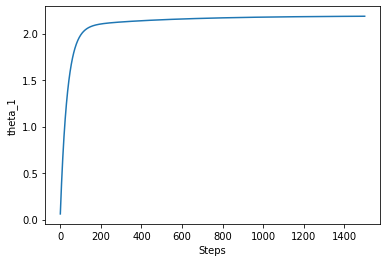

In [104]:
steps = np.linspace(0, 1500, 1500)
plt.plot(steps, theta_history[0,:])
plt.xlabel('Steps')
plt.ylabel('theta_0')
plt.show()
plt.plot(steps, theta_history[1,:])
plt.xlabel('Steps')
plt.ylabel('theta_1')
plt.show()

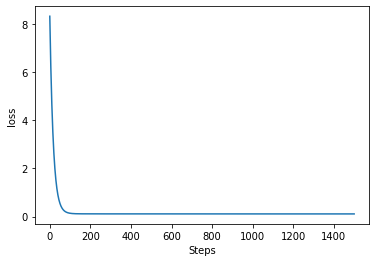

In [105]:
# How about the history of loss?
plt.plot(steps, loss_history)
plt.xlabel('Steps')
plt.ylabel('loss')
plt.show()